Data Loading and Inspection

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("products_export_1-2.csv")

# Display basic information about the dataset
print(df.info())

# Drop columns with all missing values
columns_to_drop = ['SEO Title', 'SEO Description', 'Google Shopping / Google Product Category',
                   'Google Shopping / Gender', 'Google Shopping / Age Group', 'Google Shopping / MPN',
                   'Google Shopping / Condition', 'Google Shopping / Custom Product',
                   'Google Shopping / Custom Label 0', 'Google Shopping / Custom Label 1',
                   'Google Shopping / Custom Label 2', 'Google Shopping / Custom Label 3',
                   'Google Shopping / Custom Label 4']

df = df.drop(columns=columns_to_drop, axis=1)

# Display the modified DataFrame
print(df.head())

# Handle missing values in continuous data
continuous_columns = ['Variant Compare At Price', 'Image Position', 'Image Alt Text', 'Cost per item',
                       'Price / Canada', 'Compare At Price / Canada', 'Price / United States',
                       'Compare At Price / United States']

# Fill missing values with the mean of the respective columns
df[continuous_columns] = df[continuous_columns].fillna(df[continuous_columns].mean())

# Display the modified DataFrame
print(df.head())

# Check unique values in the 'Status' column
print(df['Status'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13285 entries, 0 to 13284
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Handle                                     13285 non-null  object 
 1   Title                                      11509 non-null  object 
 2   Body (HTML)                                11493 non-null  object 
 3   Vendor                                     11509 non-null  object 
 4   Product Category                           1858 non-null   object 
 5   Type                                       11478 non-null  object 
 6   Tags                                       11465 non-null  object 
 7   Published                                  11509 non-null  object 
 8   Option1 Name                               11509 non-null  object 
 9   Option1 Value                              11588 non-null  object 
 10  Option2 Name          

Data Exploration

In [75]:
# Extract sizes using regular expressions
df['Size'] = df['Tags'].str.extract(r'(\d+-\d+mos|\d+T)')

# Display the DataFrame with the new 'Size' column
print(df[['Tags', 'Size']])

                                                    Tags     Size
0                  23dec3, _badge_Jellycat, vendor_ET141      NaN
1                 3T, _badge_Jumping Beans, vendor_ET141       3T
2                            _badge_Uniqlo, vendor_ET141      NaN
3                   23dec2, _badge_Various, vendor_ET141      NaN
4                      6-12mos, _badge_Gap, vendor_ET141  6-12mos
...                                                  ...      ...
13280    22FEBSALE, 22Janflash, 4T, various, vendor_PS05       4T
13281  0-12mos, 0-6mos, 22FEBSALE, 22Janflash, _badge...  0-12mos
13282        bauer, NWT, Shoes - 10 Toddler, vendor_CM01      NaN
13283                                                NaN      NaN
13284                            3T, character, old-navy       3T

[13285 rows x 2 columns]


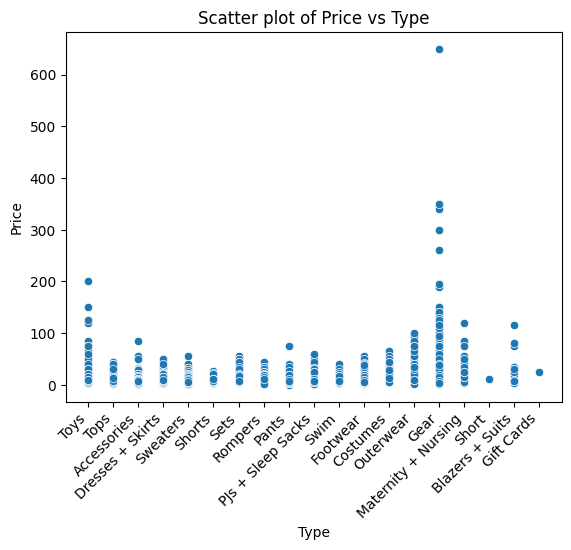

In [76]:

sns.scatterplot(x='Type', y='Variant Price', data=df)
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Type')
plt.xticks(rotation=45, ha='right')
plt.show()

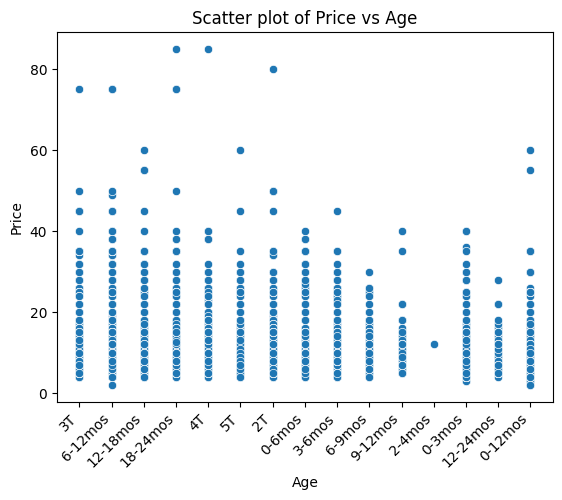

In [77]:
# Scatter plot for Age vs. Price
df_active['Age'] = df_active['Tags'].str.extract(r'(\d+-\d+mos|\d+T)')
sns.scatterplot(x='Age', y='Variant Price', data=df_active)
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Age')
plt.xticks(rotation=45, ha='right')
plt.show()

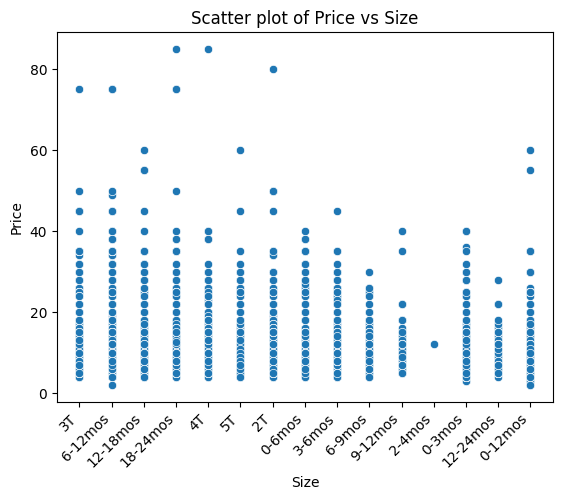

In [78]:
# Extract sizes using regular expressions
df_active['Size'] = df_active['Tags'].str.extract(r'(\d+-\d+mos|\d+T)')

# Scatter plot for Size vs. Price
sns.scatterplot(x='Size', y='Variant Price', data=df_active)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Size')
plt.xticks(rotation=45, ha='right')
plt.show()

In [79]:
df.isna()

,Handle,Title,Body (HTML),Vendor,Product Category,Type,Tags,Published,Option1 Name,Option1 Value,...,Variant Tax Code,Cost per item,Included / Canada,Price / Canada,Compare At Price / Canada,Included / United States,Price / United States,Compare At Price / United States,Status,Size
0,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,True
1,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,True
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,True
4,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13280,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,False
13281,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,False
13282,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,True
13283,False,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True


Data Cleaning

In [80]:
# Remove archived listings
df_active = df[df['Status'] == 'active'].copy()
# Clean the "Condition" column
condition_mapping = {
    'excellent': 'Excellent',
    'very good': 'Very Good',
    'like new': 'Like New',
    'brand new with tags': 'Brand New with Tags',
    'new without tags': 'New without Tags',
    'good': 'Good',
    'play': 'Play'
}

df_active['Condition'] = df_active['Body (HTML)'].str.lower().map(condition_mapping)
print(df_active)


                                        Handle  \
0                        12395avocado-pull-toy   
1                          12394plaid-shirt-3t   
2                         12393heattech-tee-3t   
3                              12392batman-bib   
4                  12391plaid-bodysuit-6-12mos   
...                                        ...   
13274                    denim-blouse-18-24mos   
13275          red-straight-leg-pants-12-18mos   
13277        superman-bodysuits-2-pack-6-12mos   
13279   grey-knit-cardigan-with-collar-6-12mos   
13280  set-of-3-long-sleeved-polo-tops-size-4t   

                                          Title  \
0                              Avocado Pull Toy   
1                              Plaid Shirt | 3T   
2                             HeatTech Tee | 3T   
3                                    Batman Bib   
4                      Plaid Bodysuit | 6-12mos   
...                                         ...   
13274                   Denim Blouse | 18-

Outlier Detection and Normalization:

In [65]:
# Identify and remove outliers using z-score
from scipy.stats import zscore

z_scores = zscore(df_active['Variant Price'])
df_active_no_outliers = df_active[(z_scores < 3)]



In [66]:
# Normalize the data
df_active_no_outliers['Variant Price'] = (df_active_no_outliers['Variant Price'] - df_active_no_outliers['Variant Price'].mean()) / df_active_no_outliers['Variant Price'].std()


<ipython-input-66-f4fe89b9e938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active_no_outliers['Variant Price'] = (df_active_no_outliers['Variant Price'] - df_active_no_outliers['Variant Price'].mean()) / df_active_no_outliers['Variant Price'].std()


Approach taken for outlier and removal

Calculate Z-scores:

Calculate z-scores for the 'Variant Price' column to quantify the deviation of each data point from the mean.
Identify Outliers:

Create a new DataFrame (df_active_no_outliers) by filtering out rows where the z-score of 'Variant Price' is less than 3, effectively removing outliers.
Normalize Data:

Normalize the 'Variant Price' column in the new DataFrame to a standard scale by subtracting the mean and dividing by the standard deviation. This ensures that the data is on a consistent scale after outlier removal.

Feature Engineering:

In [67]:
# Create a new feature 'Type_Contains' for the 'Type' column
df_active['Type_Contains'] = df_active['Title'].str.contains('Joggers', case=False).replace({True: 'Joggers', False: ''})
print(df_active[['Title', 'Type', 'Type_Contains']].head(60))

                                       Title               Type Type_Contains
0                           Avocado Pull Toy               Toys              
1                           Plaid Shirt | 3T               Tops              
2                          HeatTech Tee | 3T               Tops              
3                                 Batman Bib        Accessories              
4                   Plaid Bodysuit | 6-12mos               Tops              
5                    Flower Dress | 12-18mos   Dresses + Skirts              
6                     Cotton Dress | 9-12mos   Dresses + Skirts              
7                  Crewneck Sweater | 6-9mos           Sweaters              
8                        Winter Sweater | 3T           Sweaters              
9                      Cotton Shorts | 12mos             Shorts              
10                         Track Set | 12mos               Sets              
11                  Top + Shorts Set | 12mos               Sets 

 Regression Analysis:

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# columns with numerical or continuous values
numerical_columns = df_active_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Selecting relevant features
X = df_active_no_outliers[numerical_columns]
y = df_active_no_outliers['Variant Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values (replace NaN with the mean of each column)
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.6796034602462033e-30
R-squared: 1.0


Prediction:

In [69]:
# Impute missing values in the entire dataset
X_imputed = imputer.transform(X)

# Make predictions on the entire dataset
df_active_no_outliers_copy = df_active_no_outliers.copy()
df_active_no_outliers_copy['Predicted Price'] = model.predict(X_imputed)

# Display the first 5 rows with actual and predicted prices
print(df_active_no_outliers_copy[['Variant Price', 'Predicted Price']].head())



   Variant Price  Predicted Price
0      -0.008271        -0.008271
1      -0.008271        -0.008271
2      -0.299685        -0.299685
3      -0.882514        -0.882514
4      -0.008271        -0.008271


In [74]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# User input as variables
brand = input("Enter Brand: ")
condition = input("Enter Condition: ")
item_type = input("Enter Item Type: ")
size = input("Enter Size (optional): ")

# Create a DataFrame from user input
user_input_df = pd.DataFrame({
    'Brand': [brand],
    'Condition': [condition],
    'Type': [item_type],
    'Size': [size] if size else [np.nan],  # Handle optional size input
})

# Encode categorical variables
user_input_df_encoded = pd.get_dummies(user_input_df)

# Ensure user input DataFrame has the same columns as the training data
missing_cols = set(X_train.columns) - set(user_input_df_encoded.columns)
for col in missing_cols:
    user_input_df_encoded[col] = 0

# Reorder columns to match the order in X_train
user_input_df_encoded = user_input_df_encoded[X_train.columns]

# Impute missing values (replace NaN with the mean of each column)
user_input_imputed = imputer.transform(user_input_df_encoded)

# Make price prediction
user_price_prediction_normalized = model.predict(user_input_imputed)

# Reverse normalization for predicted price
user_price_prediction_original_scale = (user_price_prediction_normalized * df_active_no_outliers['Variant Price'].std()) + df_active_no_outliers['Variant Price'].mean()

# Calculate the median price of similar items
similar_items = df_active_no_outliers[
    (df_active_no_outliers['Vendor'] == brand) &
    (df_active_no_outliers['Condition'] == condition) &
    (df_active_no_outliers['Type'] == item_type)
]
median_price = similar_items['Variant Price'].median()

# Use the median price as the predicted price
user_price_prediction_original_scale = max(0, median_price) if np.isnan(user_price_prediction_original_scale[0]) else max(0, user_price_prediction_original_scale[0])

# Display the predicted price
print(f"Predicted Price: ${user_price_prediction_original_scale:.2f}")



Enter Brand: Zara
Enter Condition: Excellent
Enter Item Type: Coat
Enter Size (optional): 1
Predicted Price: $0.00
